In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


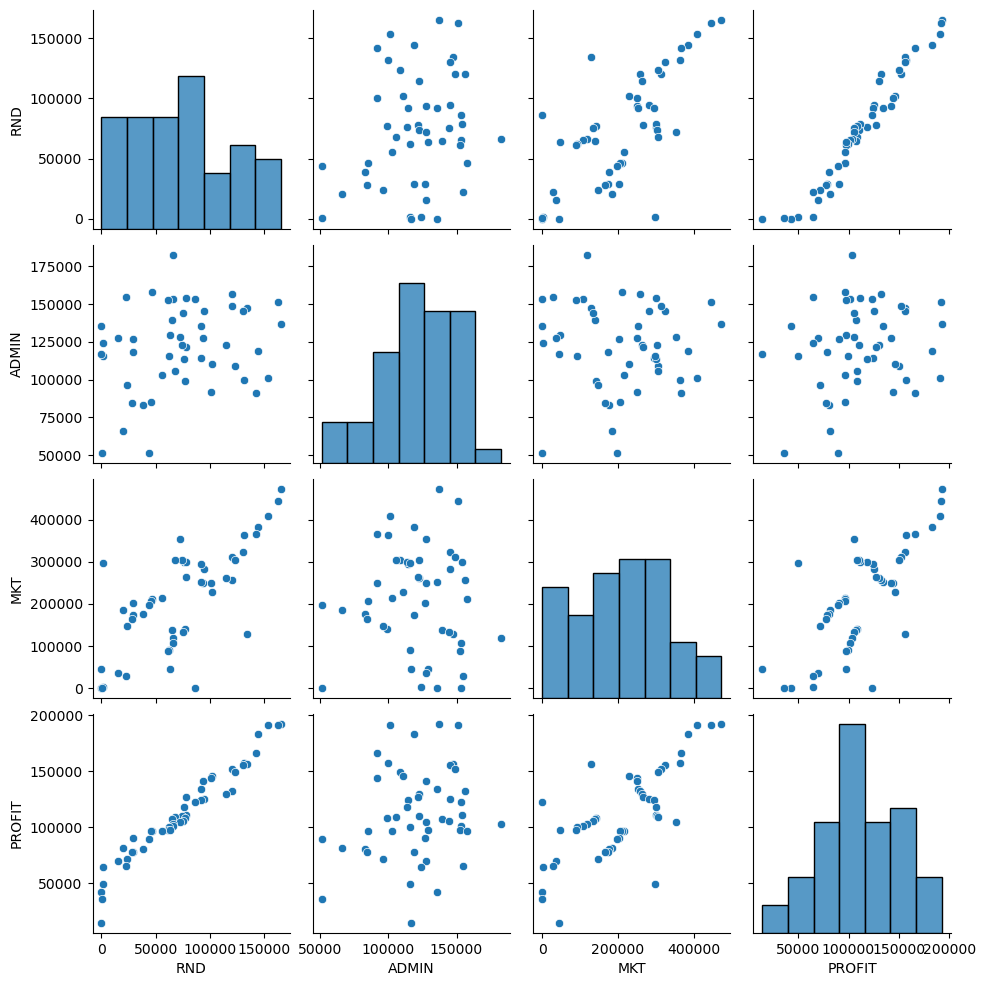

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
x= df[['RND', 'ADMIN', 'MKT']]
y = df[['PROFIT']]



In [9]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [10]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [12]:
model.intercept_

array([50122.19298987])

In [13]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [14]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [15]:
model.score(x, y)

0.9507459940683246

In [16]:
def eva(model, x, y):
    ypre = model.predict(x)

    rmse = root_mean_squared_error(y, ypre)
    mae = mean_absolute_error(y, ypre)
    mape = mean_absolute_percentage_error(y, ypre)
    r2 = r2_score(y, ypre)

    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 score : {r2:.2%}") 

In [17]:
ypre = model.predict(x)
ypre[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [18]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [19]:
eva(model, x, y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 score : 95.07%


In [20]:
rnd = 160000
admin = 80000
mkt = 95000
xnew = [[rnd, admin, mkt]]
pre = model.predict(xnew)
pre

array([[179477.98966088]])